In [4]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [35]:
## Image encoding and array shape where RGB channels
image_path = './clothing-dataset-small/train/t-shirt/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
img = load_img(image_path, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [36]:
# Preprocess the image np array with xception utility
X = np.array([x])

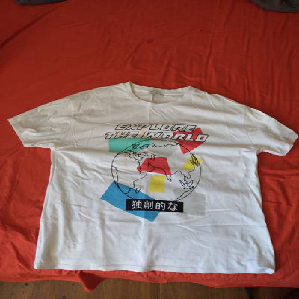

In [37]:
img

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
model = Xception(weights='imagenet', input_shape=(299,299, 3))

In [39]:
X = preprocess_input(X)

preds = model.predict(X)

1/1 [==============================] - 1s 843ms/step


In [43]:
## use decode_predictions to read the predictions classes
decode_predictions(preds)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.88693106),
  ('n02730930', 'apron', 0.006279675),
  ('n04235860', 'sleeping_bag', 0.0059950864),
  ('n04456115', 'torch', 0.005802477),
  ('n03710637', 'maillot', 0.0057547335)]]

In [9]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
trained_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(150, 150, 3),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [10]:
!ls -l clothing-dataset-small/train

total 256
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 dress
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 13:03 hat
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 13:03 longsleeve
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 13:03 pants
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 13:03 skirt
drwxr-sr-x 2 jovyan jovyan 61440 Dec 19 13:03 t-shirt


In [11]:
trained_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [12]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


In [44]:
#Basemodel that already pre-trained on Imagenet data
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [46]:
base_model.trainable = False #ConvLayers will not change ( FREEZE )

## Create new top ( Dense layer that fit our dataset 
inputs = keras.Input(shape=(150, 150, 3))
#batch 32 * 5 * 5 * 2048
base = base_model(inputs, training = False)

## Shrink 3d Base into 1D vector
pooling = keras.layers.GlobalAveragePooling2D()
# 32 * 2048
vectors = pooling(base)
# 32 * 10 [ 10 classes ]
outputs = keras.layers.Dense(10)(vectors) # we could add activation layer
model = keras.Model(inputs, outputs)

In [53]:
img = load_img(image_path, target_size=(150, 150))
x = np.array(img)
X = np.array([x])

In [54]:
X = preprocess_input(X)

preds = model.predict(X)

1/1 [==============================] - 1s 626ms/step


In [59]:
preds

array([[ 1.42625   ,  0.09430203, -0.2889111 , -0.39715165, -0.19844294,
         0.07707974,  0.73962927, -1.0503647 ,  0.01190338, -0.07806091]],
      dtype=float32)